<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:200%;
           font-family:Arial;letter-spacing:0.5px">

<p width = 20%, style="padding: 10px;
              color:white;">
Neural Networks: Keras and Tensorflow
</p>
</div>

DS-NTL-051324<p>Phase 4</p>
<br>
<br>

<div align = "right">
<img src="Images/flatiron-school-logo.png" align = "right" width="200"/>
</div>
    
    

In [1]:

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits, load_sample_images

from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import ConfusionMatrixDisplay
import seaborn as sns


#### Neural Networks: Packages

When manually implementing:

- have to keep track of forward and backwards propagation for each layer:
    - equations and updates depends on specific layer activations
- manage caching updates to gradients and weights/activations appropriately

**Deep Learning frameworks take care of this for us**

In addition:

- efficient matrix math for speedup.
- use variants of gradient descent that are **much** faster/better.

Major frameworks:

<img src = "Images/kerastf.png" >
<center> Keras: high level API of Tensorflow. </center>

- Keras: apt for quickly building/trying neural network architectures with standard layers/optimizers. Still build complex networks.
- Tensorflow: for building more customized networks and more control of optimization.

<center><img src = "Images/pytorch.png" >
More customizable than Keras. More pythonic than base Tensorflow. Nice functionalities for NLP. </center>


We will use Keras.

In [2]:
from tensorflow import keras
import tensorflow as tf

np.random.seed(42)
tf.random.set_seed(42)

Keras has two major neural network construction frameworks:
- Sequential vs Functional API

Sequential API:

<img src = "Images/sequentialvsfunctional.png" >

<center>Apt for simpler feedforward network topologies.</center>

Functional API:

<center><img src = "Images/skipconnection.png" ></center>

Skip connections, branching, etc.


#### The Sequential API

Take in a simple and sufficiently interesting dataset:

- demonstrate non-trivial decision boundary
- show sequential API at work

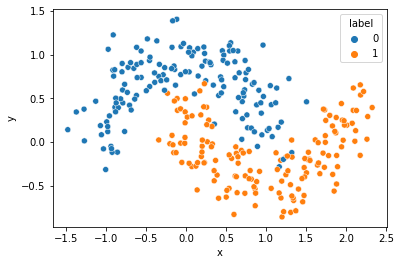

In [3]:
# generate two moons dataset
import seaborn as sns
from sklearn.datasets import make_moons
from matplotlib import pyplot
from pandas import DataFrame
# generate 2d classification dataset
X, y = make_moons(n_samples=300, noise=0.2, random_state=10)
# scatter plot, dots colored by class value
df = DataFrame(dict(x=X[:,0], y=X[:,1], label=y))

sns.scatterplot(x = 'x', y = 'y', hue = 'label', data = df )
plt.show()

Import Sequential object: use Sequential API to construct models

In [4]:
len(X)

300

In [5]:
from tensorflow.keras.models import Sequential

We want to start defining layers in the model:
    
The most common layer type in neural networks: 
- the **densely** connected layer

<img src = "Images/dense_layer.png" >

In [6]:
# creates densely connected layer object
from tensorflow.keras.layers import Dense

# defines input layer, not necessary in sequential API
# but nice for visualizing network later
from tensorflow.keras.layers import Input 

The Dense object constructor's basic arguments:
- units: number of nodes in layer
- activation: 'relu', 'tanh', 'sigmoid', 'softmax'


Defining the model: a shallow neural network

In [7]:
model = Sequential()
model.add(Dense(50, input_dim=2, activation='relu')) # one hidden layer
model.add(Dense(units=1, activation='sigmoid'))

Building/compiling the model:

- define objective function and optimizer
- define metric to evaluate train/validation
- build the network connections, weight matrices, initializes, etc.

In [8]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy', 'AUC'])

Some other loss functions:
- multiclass: 'categorical_crossentropy'
- regression: 'mean_squared_error'
- regression: 'mean_absolute_error'

The optimizer:

- Adam Optimizer: 
    - smoothens learning process 
    - uses adaptive learning rate.

A pretty good optimizer. Many other optimizers (NAdam, Adadelta).

#### Optimizers have hyperparameters.

- Can help in training speed up / finding minimum

model.compile(loss = 'binary_crossentropy', optimizer = opt, metrics = ['accuracy', 'AUC'])

In [9]:
from tensorflow.keras.optimizers import Adam

In [ ]:
opt = Adam(learning_rate = 0.01) # typical parameter

In [ ]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy', 'AUC'])

Metrics: takes in list (calculates metrics in list at each epoch):

Regression:
- 'mae'
- 'mse'
- 'rmse'

Classification:
- 'accuracy'
- 'AUC'
- 'fmeasure'
etc.

Keras provides metrics callable as objects:
- more metrics available
- pass in arguments (probability threshold, etc.)
- build your own metrics.

See documentation for more information.

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 50)                150       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 201
Trainable params: 201
Non-trainable params: 0
_________________________________________________________________


Train test split the data

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42) 

#### .fit() method

- batch_size = # of points you train on in given forward/back-prop loop

typical batch sizes: 1, 32, 64, 128, 256, 512

Batch size:

- Stochastic Gradient Descent: batch_size = 1
- Minibatch Gradient Descent: batch_size = $n_{batch} < N_{train}$
- Batch Gradient Descent: full training set fed in on each forward/back-prop loop

The intuition behind SGD, mini-batch:

SGD: single point $i$
$$ \textbf{w}_{k+1} = \textbf{w}_k - \alpha \nabla_{\textbf{w}}L(y_i, \hat{y}_i) $$

- Using a single point may not be good enough to sample loss function and its gradient. Noisy descent. 
- Can go wrong direction.
- Effectively looping one point at a time. Computationally inefficient.

Mini-batch gives you average of gradient over a sample of the training set: often good enough!

$$ \textbf{w}_{k+1} = \textbf{w}_k - \frac{\alpha}{n_{batch}} \sum_{i=1}^{n_{batch}} \nabla_{\textbf{w}}L(y_i, \hat{y}_i) $$

- Substantially smaller amount of data fed through: still make progress.

Batch gradient descent: all training data.
    
- Will always lower objective on training.
- But depending on dataset:
- manipulating huge matrices just to make one gradient descent step.

<img src = "Images/gradient_descent.png" >

#### Epochs
- Number of times to cycle through **entire** training data.
- Implies number of forward/backprop cycles is: $$ \frac{N_{train}}{n_{batch}} \times \text{epochs} $$

Can train through all epochs defined or:

**Earlystopping callback on training**

- Monitor training loss and set improvement threshold (min_delta)
- Waiting certain number of epochs if no improvements (patience)
- Terminate training

In [12]:
from tensorflow.keras.callbacks import EarlyStopping
trainCallback = EarlyStopping(monitor='loss', min_delta = 1e-6, patience = 5)

**Validation set**

- can feed an external validation set 
- hold out a fraction of training set for validation
- evaluates on train and validation at each epoch

In [13]:
history = model.fit(X_train, y_train, epochs = 10000, batch_size = 32, validation_split = 0.2, callbacks=[trainCallback])

Epoch 1/10000
6/6 [==============================] - 0s 30ms/step - loss: 0.7003 - accuracy: 0.4635 - auc: 0.5818 - val_loss: 0.6642 - val_accuracy: 0.5417 - val_auc: 0.5982
Epoch 2/10000
6/6 [==============================] - 0s 2ms/step - loss: 0.6801 - accuracy: 0.4531 - auc: 0.7017 - val_loss: 0.6465 - val_accuracy: 0.5000 - val_auc: 0.6812
Epoch 3/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.6603 - accuracy: 0.4896 - auc: 0.7783 - val_loss: 0.6289 - val_accuracy: 0.5417 - val_auc: 0.7437
Epoch 4/10000
6/6 [==============================] - 0s 2ms/step - loss: 0.6414 - accuracy: 0.5990 - auc: 0.8293 - val_loss: 0.6125 - val_accuracy: 0.6875 - val_auc: 0.7875
Epoch 5/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.6241 - accuracy: 0.6510 - auc: 0.8565 - val_loss: 0.5970 - val_accuracy: 0.7083 - val_auc: 0.8518
Epoch 6/10000
6/6 [==============================] - 0s 2ms/step - loss: 0.6080 - accuracy: 0.6771 - auc: 0.8714 - val_loss: 0.5820 - 

In [14]:
len(X_train)

240

In [15]:
# predict method outputs probability of
# being class 1
y_proba = model.predict(X_test) 
y_proba[0:5]

array([[9.9990892e-01],
       [9.9798709e-01],
       [9.7122085e-01],
       [9.9817866e-01],
       [5.7782398e-07]], dtype=float32)

In [16]:
# getting class predictions
y_pred = (y_proba > 0.5).astype('int')
y_pred[0:5]

array([[1],
       [1],
       [1],
       [1],
       [0]])

In [17]:
# returns loss + results of metrics used
_, test_accuracy, test_AUC = model.evaluate(X_test, y_test, verbose=0)
print(test_accuracy, test_AUC)

0.9666666388511658 0.9988776445388794


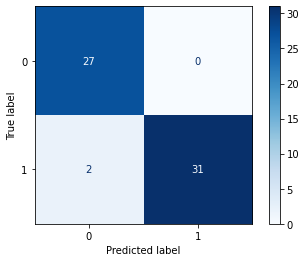

In [18]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot(cmap=plt.cm.Blues)
plt.show()

View decision boundary

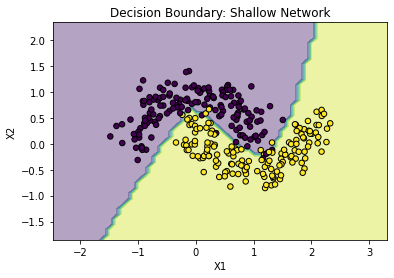

In [19]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

f, ax = plt.subplots()

Z = (model.predict(np.c_[xx.ravel(), yy.ravel()]) > 0.5).astype('int')
Z = Z.reshape(xx.shape)
ax.contourf(xx, yy, Z, alpha=0.4)
ax.scatter(X[:, 0], X[:, 1], c = y, s=30, edgecolor="k")
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_title('Decision Boundary: Shallow Network')
plt.show()

The model object returns a history method:
- history attribute is a dictionary storing:
   - training/validation losses.
   - metrics on train/validation sets.

In [20]:
train_loss = history.history['loss']
validation_loss = history.history['val_loss']
train_history = pd.DataFrame(history.history)
train_history.index.name = 'epochs'
train_history.head()

,loss,accuracy,auc,val_loss,val_accuracy,val_auc
epochs,,,,,,
0,0.700327,0.463542,0.581761,0.664245,0.541667,0.598214
1,0.680077,0.453125,0.701702,0.646499,0.500000,0.681250
2,0.660328,0.489583,0.778335,0.628945,0.541667,0.743750
3,0.641372,0.598958,0.829279,0.612484,0.687500,0.787500
4,0.624063,0.651042,0.856496,0.597029,0.708333,0.851786


Plotting history:

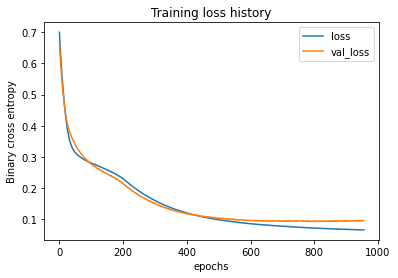

In [21]:
col_list = ['loss', 'val_loss']
train_history[col_list].plot()
plt.ylabel('Binary cross entropy')
plt.title('Training loss history')
plt.show()

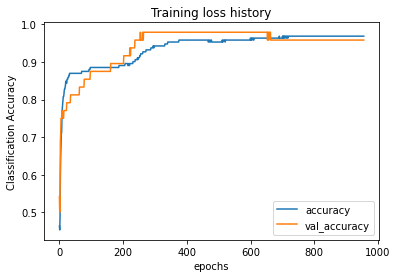

In [22]:
col_list = ['accuracy', 'val_accuracy']
train_history[col_list].plot()
plt.ylabel('Classification Accuracy')
plt.title('Training loss history')
plt.show()

#### Using neural networks to solve some harder problems

#### Image classificaton of hand-written digits

- The MNIST dataset: a classic benchmark for neural network image classification

In [23]:
from tensorflow.keras import datasets
from tensorflow.keras.utils import to_categorical # for target labels
from tensorflow.keras.layers import Flatten # takes 2D input and turns into 1D array

In [24]:
# load in the data
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()

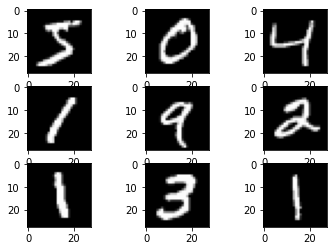

In [25]:
for i in range(9):  
    plt.subplot(330 + 1 + i)
    plt.imshow(x_train[i], cmap=pyplot.get_cmap('gray'))
plt.show()

Good practice to normalize/standardize feature inputs:
- makes learning faster (optimization doesn't depend on variable scale)


<img src = "Images/normalize_nn.png" >

Another reason:
- keeping values small helps keeps weights stable

In [26]:
x_train = x_train/255 # normalization
x_test = x_test/255

# Keras requires multi-class labels to be one-hot encoded
y_tr_one_hot = to_categorical(y_train)
y_tt_one_hot = to_categorical(y_test)
y_tt_one_hot

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

#### Sequential model: add another hidden layer

- additional layer will help us learn more complex features
- note: we've added a few more units in first hidden layer as well.

In [54]:
model_images = Sequential()
foo = Flatten(input_shape=(28,28))
#model_images.add(Flatten(input_shape=(28, 28))) # flattens each 28x28 image into a vector
model_images.add(Dense(32, activation='relu', input_shape=(784,)))
model_images.add(Dense(8, activation='relu'))
model_images.add(Dense(10, activation='softmax')) # number of units = number of target classes

In [50]:
model_images.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'] )

Let's train the model.

- Here we will use **validation** loss: stopping to prevent overfitting.

In [51]:
valcallback = EarlyStopping(monitor='val_loss', mode='min', verbose = 1, patience = 2)

In [52]:
history_mnist = model_images.fit(x_train, y_tr_one_hot, epochs=100, batch_size= 32, validation_split = 0.2, 
                 callbacks = [trainCallback] )

Epoch 1/100


ValueError: in user code:

    c:\Users\daled\anaconda3\envs\learn-env\lib\site-packages\tensorflow\python\keras\engine\training.py:806 train_function  *
        return step_function(self, iterator)
    c:\Users\daled\anaconda3\envs\learn-env\lib\site-packages\tensorflow\python\keras\engine\training.py:796 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    c:\Users\daled\anaconda3\envs\learn-env\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    c:\Users\daled\anaconda3\envs\learn-env\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    c:\Users\daled\anaconda3\envs\learn-env\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2945 _call_for_each_replica
        return fn(*args, **kwargs)
    c:\Users\daled\anaconda3\envs\learn-env\lib\site-packages\tensorflow\python\keras\engine\training.py:789 run_step  **
        outputs = model.train_step(data)
    c:\Users\daled\anaconda3\envs\learn-env\lib\site-packages\tensorflow\python\keras\engine\training.py:747 train_step
        y_pred = self(x, training=True)
    c:\Users\daled\anaconda3\envs\learn-env\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:975 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs,
    c:\Users\daled\anaconda3\envs\learn-env\lib\site-packages\tensorflow\python\keras\engine\input_spec.py:212 assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer sequential_4 is incompatible with the layer: expected axis -1 of input shape to have value 784 but received input with shape [32, 28, 28]


In [31]:
# probability for each class
y_proba = model_images.predict(x_test)
y_proba

array([[5.6731844e-25, 4.3256008e-20, 2.2010735e-07, ..., 9.9999976e-01,
        9.2810671e-17, 2.2071010e-21],
       [1.3654474e-15, 3.5499511e-08, 9.9996245e-01, ..., 2.0029093e-13,
        1.0565594e-08, 2.8986095e-25],
       [9.3395442e-08, 9.9998569e-01, 3.6669562e-06, ..., 9.3031422e-06,
        3.1626442e-07, 2.2360886e-08],
       ...,
       [8.1631407e-29, 2.8083942e-28, 4.6469276e-28, ..., 1.4222588e-13,
        5.5926363e-15, 1.1949748e-08],
       [7.6294622e-14, 5.9359465e-31, 3.3562775e-23, ..., 1.8402471e-22,
        2.0836413e-05, 2.4030097e-16],
       [1.0505138e-09, 5.3209710e-26, 2.8238974e-12, ..., 4.6533930e-32,
        9.5651578e-19, 7.9889157e-25]], dtype=float32)

In [32]:
y_proba[0]

array([5.6731844e-25, 4.3256008e-20, 2.2010735e-07, 4.0038255e-12,
       1.7686069e-26, 3.8429362e-23, 7.3928906e-37, 9.9999976e-01,
       9.2810671e-17, 2.2071010e-21], dtype=float32)

In [33]:
model_images.evaluate(x_test, y_tt_one_hot, verbose = 0)

[0.25193536281585693, 0.9614999890327454]

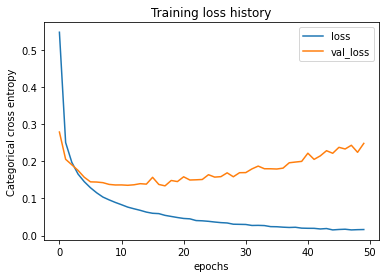

In [34]:
train_mnist_history = pd.DataFrame(history_mnist.history)
train_mnist_history.index.name = 'epochs'

col_list = ['loss', 'val_loss']
train_mnist_history[col_list].plot()
plt.ylabel('Categorical cross entropy')
plt.title('Training loss history')
plt.show()

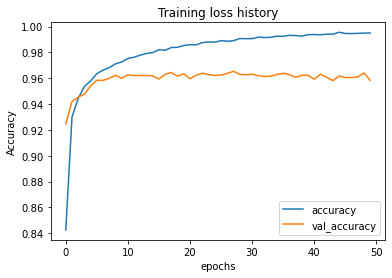

In [35]:
col_list = ['accuracy', 'val_accuracy']
train_mnist_history[col_list].plot()
plt.ylabel('Accuracy')
plt.title('Training loss history')
plt.show()

Clearly, some overfitting.

Getting the class predictions from softmax probabilities.

In [36]:
# argmax axis = -1 gets the column index of maximum probability for each row.
# column index corresponds to digit classes (numbers 0 -9)
predicted = np.argmax(y_proba, axis=-1)
predicted

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

Let's look at our classifier did on the test set in more detail.

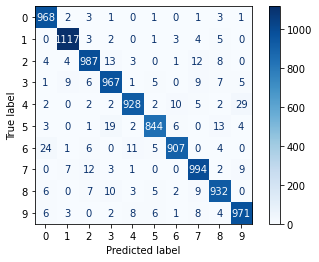

In [37]:
cm_digits = confusion_matrix(y_test, predicted)
disp = ConfusionMatrixDisplay(
    confusion_matrix=cm_digits)

disp.plot(cmap=plt.cm.Blues)
plt.show()

Not bad:
- but in the context of many tasks this is not yet a viable system.
- e.g., reading checks, etc

- Next steps: increasing network complexity / train longer but not overfitting
- getting better fitting and test-set generalization

<center><b>Network Regularization</b></center>